In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
df = pd.read_csv('sample_health_data.csv')

# Encode the target variable (Disorder)
df['Disorder_Code'] = df['Disorder'].astype('category').cat.codes
disorder_mapping = dict(enumerate(df['Disorder'].astype('category').cat.categories))

# Split the data into features and target
X = df.drop(['Disorder', 'Disorder_Code'], axis=1)
y = df['Disorder_Code']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=disorder_mapping.values()))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Example: Predicting the disease for a new set of symptoms
new_symptoms = pd.DataFrame({
    'Fever': [0],
    'Cough': [1],
    'Fatigue': [0],
    'Headache': [1],
    'Sore_Throat': [1],
    'Shortness_of_Breath': [0],
    'Chest_Pain': [0],
    'Nausea': [0],
    'Vomiting': [1],
    'Diarrhea': [1]
})

# Make a prediction for the new symptoms
predicted_disease_code = model.predict(new_symptoms)
predicted_disease = disorder_mapping[predicted_disease_code[0]]

print("Predicted Disease:", predicted_disease)


Classification Report:
                 precision    recall  f1-score   support

        Allergy       0.00      0.00      0.00         2
       COVID-19       1.00      0.40      0.57         5
    Common Cold       0.00      0.00      0.00         2
            Flu       0.00      0.00      0.00         2
Gastroenteritis       0.50      0.25      0.33         4
  Heart Disease       0.00      0.00      0.00         1
       Migraine       0.00      0.00      0.00         2
      Pneumonia       0.25      0.50      0.33         2

       accuracy                           0.20        20
      macro avg       0.22      0.14      0.15        20
   weighted avg       0.38      0.20      0.24        20

Accuracy: 0.2
Predicted Disease: Migraine


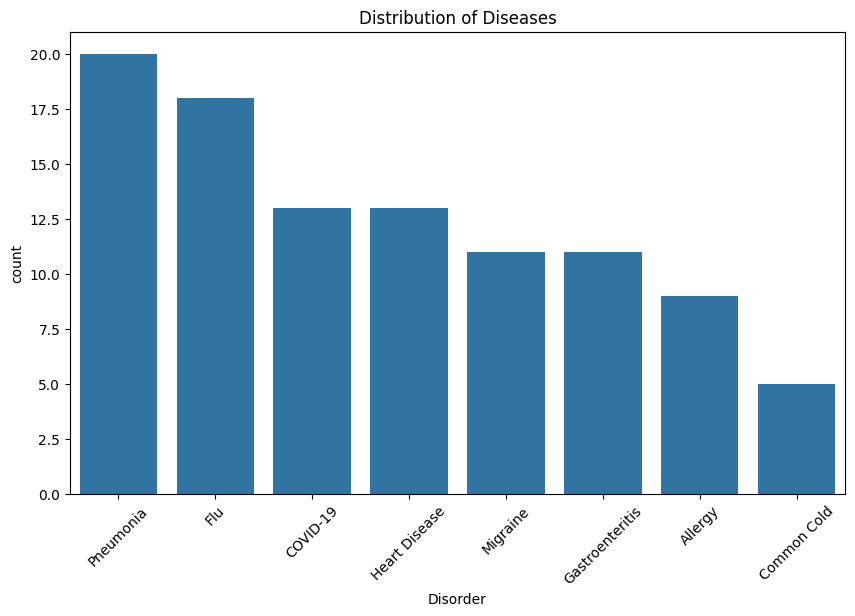

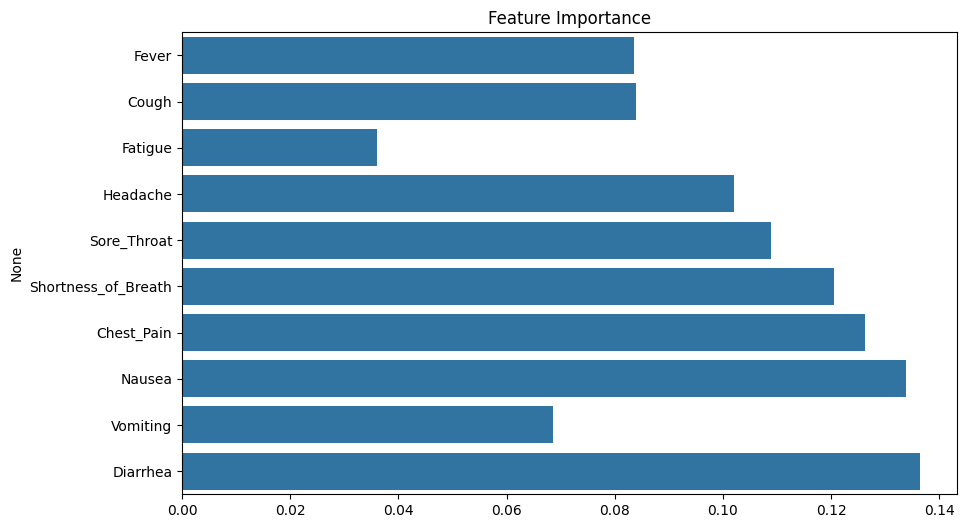

In [3]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of diseases
plt.figure(figsize=(10, 6))
diseases = df['Disorder'].value_counts().index
sns.countplot(data=df, x='Disorder', order=diseases)
plt.title('Distribution of Diseases')
plt.xticks(rotation=45)
plt.show()

# Plot feature importance
features = X.columns
importances = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.show()